In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv("customer_support_tickets.csv")

# Preview the first few rows
print(df.head())
print(df.columns)


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [2]:
# Remove rows where Ticket Description is missing
df = df.dropna(subset=['Ticket Description'])

# Create a lowercase version of the text
df['cleaned_message'] = df['Ticket Description'].astype(str).str.lower()


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Define a preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and convert to lowercase
    words = [word.lower() for word in tokens if word.isalpha()]
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Apply preprocessing to the cleaned message column
df['tokens'] = df['cleaned_message'].apply(preprocess_text)

# Show sample of tokens
print(df[['cleaned_message', 'tokens']].head())



                                     cleaned_message  \
0  i'm having an issue with the {product_purchase...   
1  i'm having an issue with the {product_purchase...   
2  i'm facing a problem with my {product_purchase...   
3  i'm having an issue with the {product_purchase...   
4  i'm having an issue with the {product_purchase...   

                                              tokens  
0  [issue, please, assist, billing, zip, code, ap...  
1  [issue, please, assist, need, change, existing...  
2  [facing, problem, turning, working, fine, yest...  
3  [issue, please, assist, problem, interested, l...  
4  [issue, please, assist, note, seller, responsi...  


In [5]:
from collections import Counter

# Combine all tokens into one list
all_words = [word for tokens in df['tokens'] for word in tokens]

# Get the most common words
word_freq = Counter(all_words).most_common(20)

# Convert to DataFrame for visualization
freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

print(freq_df)


        Word  Frequency
0      issue      11529
1     please       8810
2     assist       6147
3    problem       2285
4    product       2268
5       data       1655
6   software       1553
7    account       1463
8      steps       1390
9    noticed       1208
10  persists       1178
11      help       1172
12   resolve       1165
13    update       1155
14     would       1126
15    device       1111
16    unable       1088
17     could       1066
18     tried       1034
19     using       1029


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2252\1158178781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='Frequency', y='Word', palette='viridis')


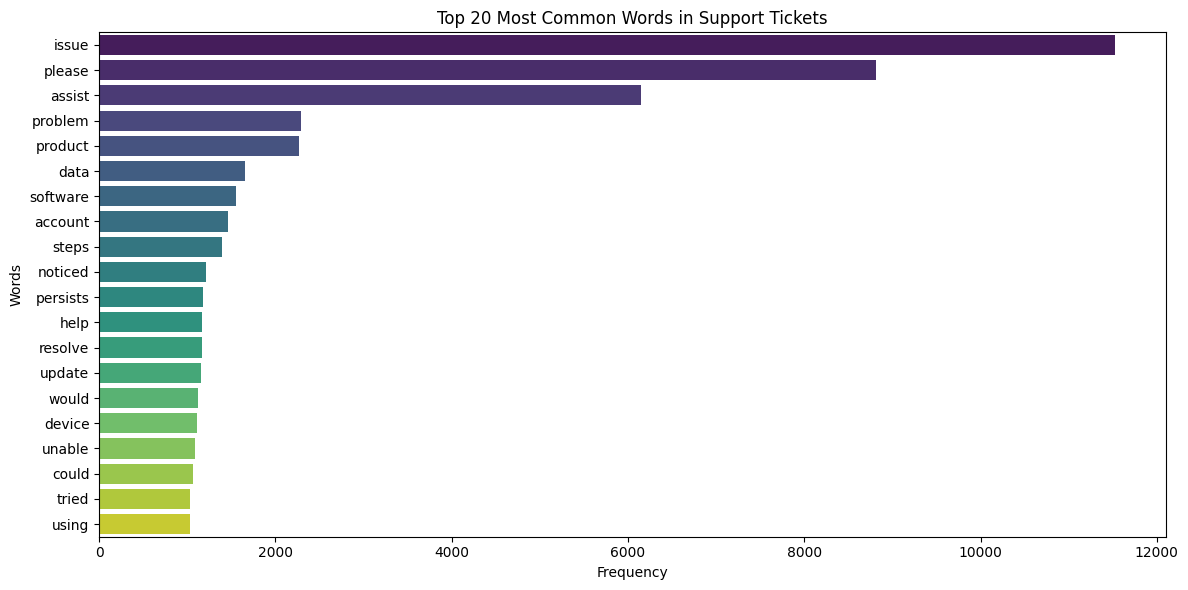

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=freq_df, x='Frequency', y='Word', palette='viridis')
plt.title("Top 20 Most Common Words in Support Tickets")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


In [7]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_message'].apply(get_sentiment)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2252\2660704771.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


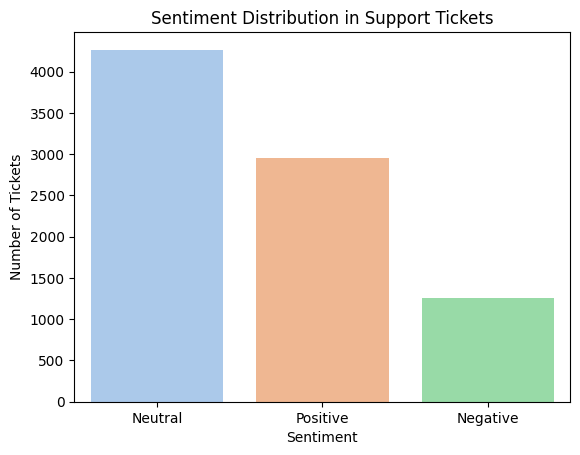

In [8]:
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution in Support Tickets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tickets")
plt.show()
